In [4]:
%matplotlib notebook
%pylab
%matplotlib inline

import pandas as pd
import glob

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/home/bkyanjo/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
def read_gauge_data(gauge_file):
    """
    Read gauge data from a guage file.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(2,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    levels = data1[:,0]
    time = data1[:,1]
    h = data1[:,2]
    hu = data1[:,3]
    hv = data1[:,4]
    eta = data1[:,5]

    u = zeros(len(hu))
    for i in range(len(hu)):
        if h[i] == 0:
            u[i] = 0
        else:
            u[i] = hu[i]/h[i]

    return time, h,eta,u


def read_valid(gauge_file):
    """
    Read gauge data from a literature data.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(1,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    guage = data1[:,0]
    z = data1[:,1]
    h_max = data1[:,2]
    eta_max = data1[:,3]

    return h_max, eta_max

In [14]:
time,h,eta, u = read_gauge_data("gauge00000.txt")
# print time, h, eta, topo
print('time =  ', time/3600)
print('h = ', h)
print('eta = ', eta)
# print('topo = ', topo)

time =   [0.         0.00013889 0.00027778 0.00041667 0.00055556 0.00069444
 0.00083333 0.00097222 0.00111111 0.00125    0.00138889 0.00152778
 0.00166667 0.00180556 0.00194444 0.00208333 0.00222222 0.00236111
 0.0025     0.00263889 0.00277778 0.00291667 0.00305556 0.00319444
 0.00333333 0.00347222 0.00361111 0.00375    0.00388889 0.00402778
 0.00416667 0.00430556 0.00444444 0.00458333 0.00472222 0.00486111
 0.005      0.00513889 0.00527778 0.00541667 0.00555556 0.00569444
 0.00583333 0.00597222 0.00611111 0.00625    0.00638889 0.00652778
 0.00666667 0.00680556 0.00694444 0.00708333 0.00722222 0.00736111
 0.0075     0.00763889 0.00777778 0.00791667 0.00805556 0.00819444
 0.00833333 0.00847222 0.00861111 0.00875    0.00888889 0.00902778
 0.00916667 0.00930556 0.00944444 0.00958333 0.00972222 0.00986111
 0.01       0.01013889 0.01027778 0.01041667 0.01055556 0.01069444
 0.01083333 0.01097222 0.01111111 0.01125    0.01138889 0.01152778
 0.01166667 0.01180556 0.01194444 0.01208333 0.012222

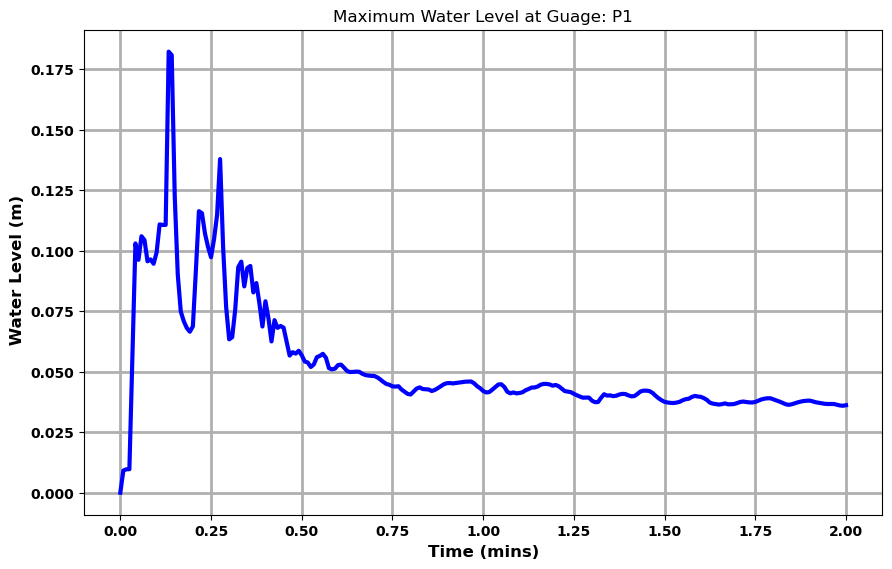

In [16]:
time,h,eta, u = read_gauge_data("gauge00000.txt")
# time,h,eta, topo = read_gauge_data("results/gauge00000.txt")

# plot the data
figsize(10.30, 6.30)
# figure(figsize=(13.22, 8.90), dpi=300)
# rcParams['font.family'] = 'Arial'
figure(5)
plot(time/60,eta,'b-',label='GeoFlood',linewidth=3)
# plot (time/3600,[10.35]*len(h),'g--',label='GeoClaw',linewidth=3)
# plot (time/3600,[10.25]*len(h),'k--',label='Valid',linewidth=3)
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

# axis([0, 600,0.0, 4])

# line = Line2D([0], [0], label='HEC-RAS', color='r', linewidth=3)
ylabel(' Water Level (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Time (mins)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# # legend(handles=handles, prop={'size': 10, 'weight': 'bold'},frameon=False)
# colors = ['blue', 'red']
# lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
# labels = ['GeoFlood','HEC-RAS (Brunner (2018))']
# legend(lines, labels,prop={'size': 10, 'weight': 'bold'})
# #  show a legend without plotting anything

# time_n = arange(0,400,50)
# pstr = ([f'{N:d}' for N in time_n])
# xticks(time_n,pstr)
# #  show the last point on the x axis
# y_n = arange(0.0,0.6,0.1)
# pstr = ([f'{N:.2f}' for N in y_n])
# yticks(y_n,pstr)

rcParams['axes.labelweight'] = 'bold'
xticks(fontweight='bold')
yticks(fontweight='bold')
title('Maximum Water Level at Guage: P1')
grid(linewidth=2)
show()

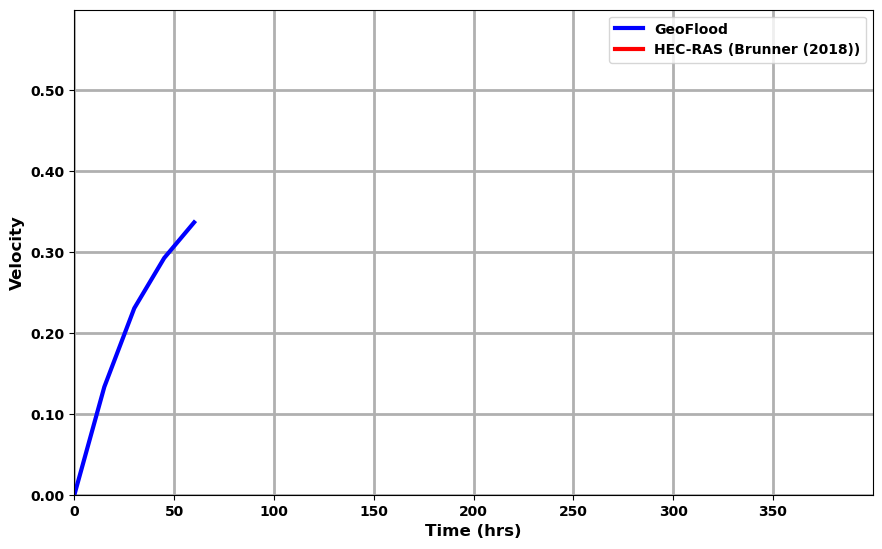

In [33]:
time,h,eta, u = read_gauge_data("gauge00000.txt")
# time,h,eta, topo = read_gauge_data("results/gauge00000.txt")

# plot the data
figsize(10.30, 6.30)
# figure(figsize=(13.22, 8.90), dpi=300)
# rcParams['font.family'] = 'Arial'
figure(5)
plot(time/60,u,'b-',label='GeoFlood',linewidth=3)
# plot (time/3600,[10.35]*len(h),'g--',label='GeoClaw',linewidth=3)
# plot (time/3600,[10.25]*len(h),'k--',label='Valid',linewidth=3)
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

axis([0, 400,0.0, 0.6])

# line = Line2D([0], [0], label='HEC-RAS', color='r', linewidth=3)
ylabel('Velocity', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Time (hrs)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# legend(handles=handles, prop={'size': 10, 'weight': 'bold'},frameon=False)
colors = ['blue', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['GeoFlood','HEC-RAS (Brunner (2018))']
legend(lines, labels,prop={'size': 10, 'weight': 'bold'})
#  show a legend without plotting anything

time_n = arange(0,400,50)
pstr = ([f'{N:d}' for N in time_n])
xticks(time_n,pstr)
#  show the last point on the x axis
y_n = arange(0.0,0.6,0.1)
pstr = ([f'{N:.2f}' for N in y_n])
yticks(y_n,pstr)

rcParams['axes.labelweight'] = 'bold'
xticks(fontweight='bold')
yticks(fontweight='bold')
# title('Maximum Water Level at Guage: P1')
grid(linewidth=2)
show()

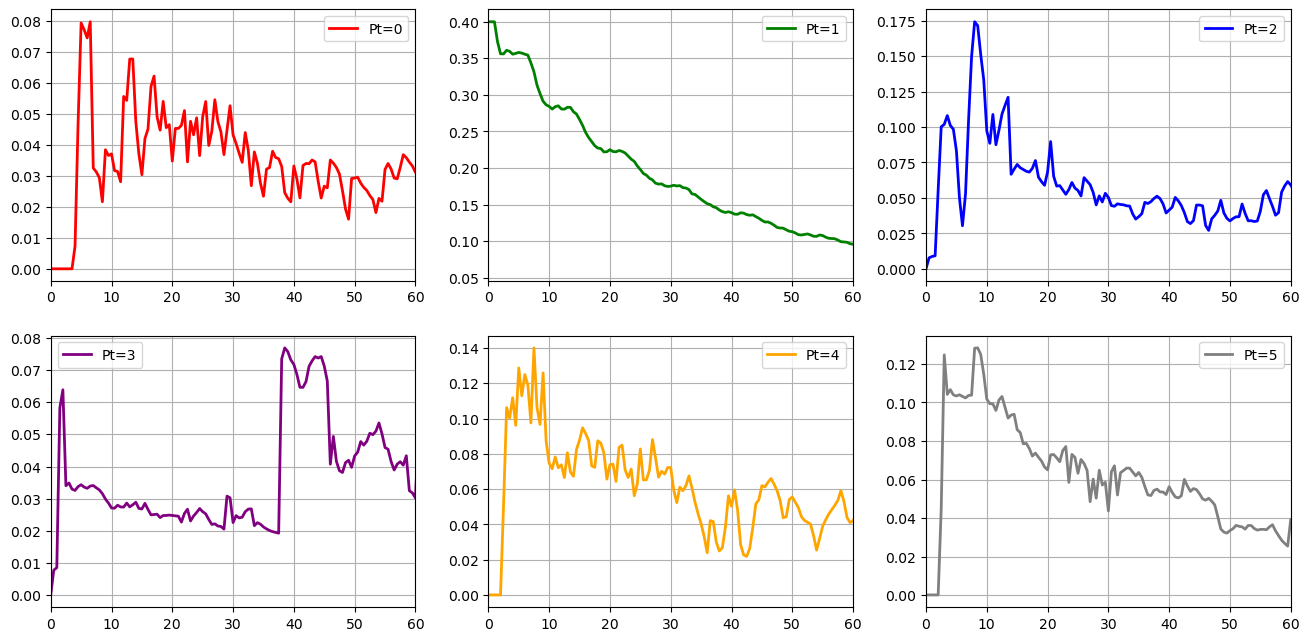

In [25]:
# write a function taht reads all the gauge data and plot them into 16 subplots
import matplotlib.pyplot as plt
def plot_gauge():
    #  look for all gauge files
    gauge_files = glob.glob('gauge*.txt')
    figsize(16, 12)
    colours = ['red', 'green', 'blue', 'purple', 'orange', 'gray']
    for gauge in range(len(gauge_files)):
        time, h,eta, topo = read_gauge_data(gauge_files[gauge])
        # plot the data
        subplot(3,3,gauge+1)
        plot(time,eta,color=colours[gauge],label=f'Pt={gauge}',linewidth=2)
        
        # if gauge < 12:
        #     xticks([])  
        # add a legend
        xlim(0,60)
        grid()
        legend(loc='best')
plot_gauge()